In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
notebook_path = os.getcwd()  
parent_path = os.path.dirname(notebook_path)
lab2_path = os.path.join(parent_path, 'Lab 2 - Discrete events simulation/Code')
sys.path.append(lab2_path)
from common import (Event,Scenario,simulate) #Import your solution from the previous lab.

# Statistical analysis
## Moving mean and variance

In [2]:
def moving_mean_var(new_data,old_mean,old_var,t):
    """ Calculates moving sample mean and variance at time t.
    
    Keywords:
        new_data (float): new data point arriving at time t.
        old_mean (float): previous sample mean.
        old_var (float): previous sample variance.
        t (int): time index
    
    Returns:
        new_mean (float): updated sample mean.
        new_var (float): updated sample variance.
    """
    ###
    # if t == 0:
        # If this is the first data point, initialize mean and variance
    # new_mean = 0
    # new_var = 0  # Variance is 0 as there's only one data point
    # else:
    new_mean = old_mean + (new_data - old_mean) / (t+1)
    # Correct formula to calculate the new variance
    new_var = (1 - 1 / (t - 1)) * old_var + (t) * (new_mean - old_mean) ** 2
    return new_mean, new_var
    ###

## Queue simulation

In [44]:
def moving_mean_var(new_data, old_mean, old_var, k):
    """ Calculates moving sample mean and variance at time k.
    
    Keywords:
        new_data (float): new data point arriving at time k.
        old_mean (float): previous sample mean.
        old_var (float): previous sample variance.
        k (int): time index (starting from 1)
    
    Returns:
        new_mean (float): updated sample mean.
        new_var (float): updated sample variance.
    """
    if k == 0:
        # If this is the first data point, initialize mean and variance
        new_mean = new_data
        new_var = 0  # Variance is 0 as there's only one data point
    else:
        # Update the mean according to the slide formula
        new_mean = old_mean + (new_data - old_mean) / (k+1)
        # Update the variance according to the slide formula
        new_var = (1 - 1/k) * old_var + (k+1) * (new_mean - old_mean)**2

    return new_mean, new_var

In [45]:
times_queues = simulate(Scenario())
new_data = np.max(times_queues[1])  

In [13]:
###
def draw(seed = 2024,precision = 0.5):
    np.random.seed(seed)
    means = []
    vars = []
    data = []
    epoch = 0
    while True:
        epoch += 1
        if epoch == 1: 
            times_queues = simulate(Scenario())
            mean = np.max(times_queues[1])
            data.append(mean)
            var = 0
            means.append(mean)
            vars.append(var)
        else:
            times_queues = simulate(Scenario())
            new_data = np.max(times_queues[1])  
            data.append(new_data)
            mean, var= moving_mean_var(new_data,mean,var,epoch)
            means.append(mean)
            vars.append(var)
        if epoch >= 100 and np.sqrt(var / epoch) < precision:
            break
    return means,vars,data

Plot the mean maximum queue length and standard deviation

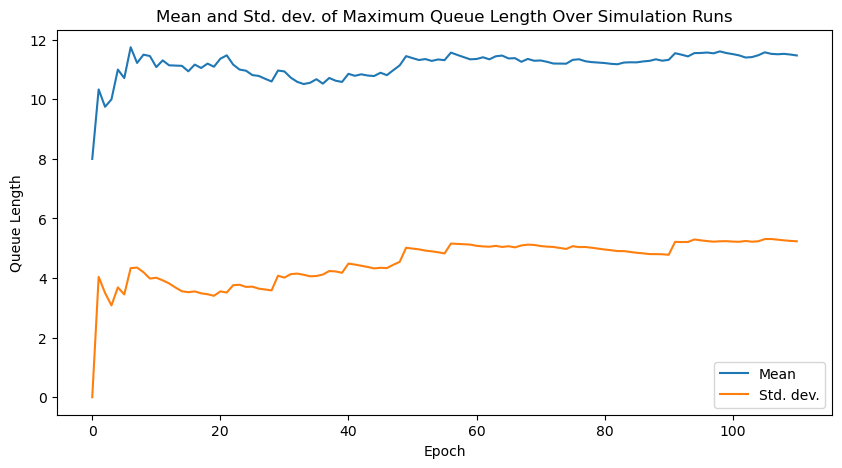

In [14]:
###
means,vars,data = draw()
std = np.sqrt(vars)
plt.figure(figsize=(10, 5))
plt.plot(means, label='Mean')
# plt.plot(vars, label='Variance Maximum Queue Length')
plt.plot(std, label='Std. dev.')
plt.xlabel('Epoch')
plt.ylabel('Queue Length')
plt.title('Mean and Std. dev. of Maximum Queue Length Over Simulation Runs')
plt.legend()
plt.show()
###

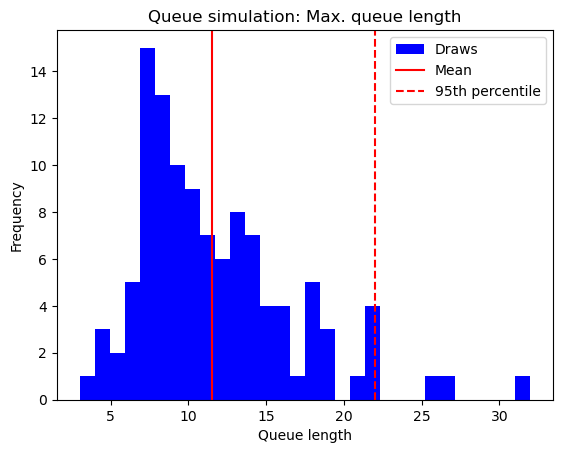

Mean = 11.504504504504505
MSE = 0.23474610972179358
σ/n = 0.523494808638839
95 percentile = 22.0


In [36]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

means,vars,data = draw(seed=2024,precision=0.5)
std = np.sqrt(vars)
criterion = std[-1]/np.sqrt(n)


mean = np.mean(data)
percentile_95 = np.percentile(data, 95)
std = np.sqrt(vars)
plt.hist(data, bins=30, color='blue', label='Draws')  # Adjust the number of bins as needed
plt.axvline(mean, color='red', linestyle='-', label='Mean')
plt.axvline(percentile_95, color='red', linestyle='--', label='95th percentile')

plt.xlabel('Queue length')
plt.ylabel('Frequency')
plt.title('Queue simulation: Max. queue length')
plt.legend()
plt.show()

# mse = np.mean((data - mean)**2)/n
mse = np.sum(vars)/(n**2)
print('Mean = '+ str(mean))
print('MSE = '+ str(mse))
print('σ/n = '+ str(criterion))
print('95 percentile = '+ str(percentile_95))



    ## Bootstrapping

In [41]:
def bootstrap(data,R=3000):
    """ Calculates the bootstrap mse of a statistic of choice

    Keywords:
        data (array): data array.
        f_statistic: function handle calculating the statistic of interest.
        draws (int): number of bootstrap draws.

    Returns:
        mse (float): mean square error of the statistic of interest.
    """
    mean = np.mean(data)
    sum = 0.0
    n = len(data)
    for l in range(0, R):
        b = []
        for i in range(0, n):
            r = np.random.rand()
            index = int(n * r)
            b.append(data[index])
        b.sort()
        bootstrap_mean = np.mean(b)
        sum += (bootstrap_mean - mean) ** 2
        MSE_bootstrap = sum/R
    return MSE_bootstrap

def bootstrap_quantile(data,R=3000):
    theP=95
    data.sort()
    quantile = float(np.percentile(data, theP))
    sum = 0.0
    for l in range(0, R):
        n = len(data)
        b = []
        for i in range(0, n):
            r = np.random.rand()
            index = int(n * r)
            b.append(data[index])
        b.sort()
        q = float(np.percentile(b, theP))
        sum += (quantile - q) ** 2
        MSE_quantile = sum/R
    return MSE_quantile


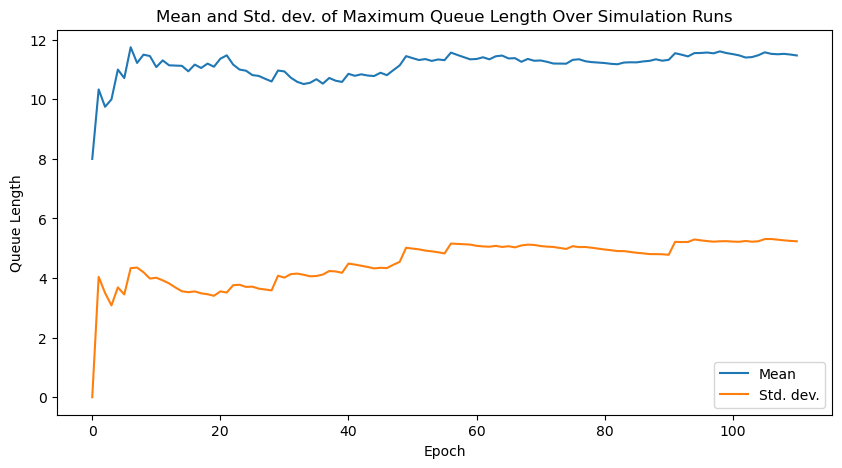

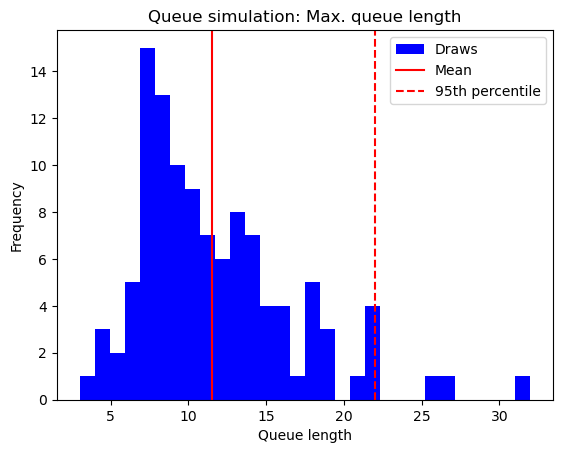

N = 111
Mean = 11.504504504504505 MSE: 0.2459 MSE_bootstrap: 0.2374
95% quantile=22.0000 MSE_bootstrap: 3.1788


In [42]:
means,vars,data = draw(seed=2024,precision=0.5)
theP=95
data.sort()
quantile = float(np.percentile(data, theP))
MSE  = np.var(data)/len(data)

MSE_bootstrap = bootstrap(data)
MSE_quantile = bootstrap_quantile(data)

mean = np.mean(data)
percentile_95 = np.percentile(data, 95)

std = np.sqrt(vars)
plt.figure(figsize=(10, 5))
plt.plot(means, label='Mean')
# plt.plot(vars, label='Variance Maximum Queue Length')
plt.plot(std, label='Std. dev.')
plt.xlabel('Epoch')
plt.ylabel('Queue Length')
plt.title('Mean and Std. dev. of Maximum Queue Length Over Simulation Runs')
plt.legend()
plt.show()



plt.hist(data, bins=30, color='blue', label='Draws')  # Adjust the number of bins as needed
plt.axvline(mean, color='red', linestyle='-', label='Mean')
plt.axvline(percentile_95, color='red', linestyle='--', label='95th percentile')

plt.xlabel('Queue length')
plt.ylabel('Frequency')
plt.title('Queue simulation: Max. queue length')
plt.legend()
plt.show()

# mse = np.mean((data - mean)**2)/n
print('N = '+str(len(data)))
print('Mean = '+ str(mean),f'MSE: {MSE:.4f}', f'MSE_bootstrap: {MSE_bootstrap:.4f}')
print(f'{theP}% quantile={quantile:.4f}',f'MSE_bootstrap: {MSE_quantile:.4f}')

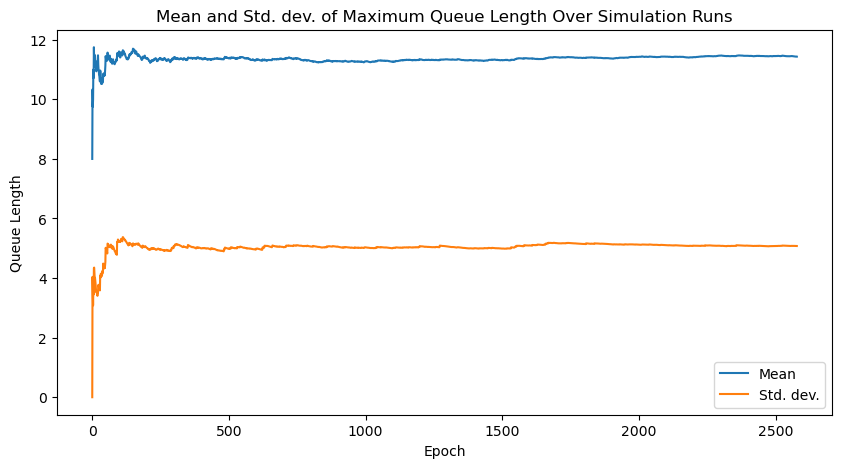

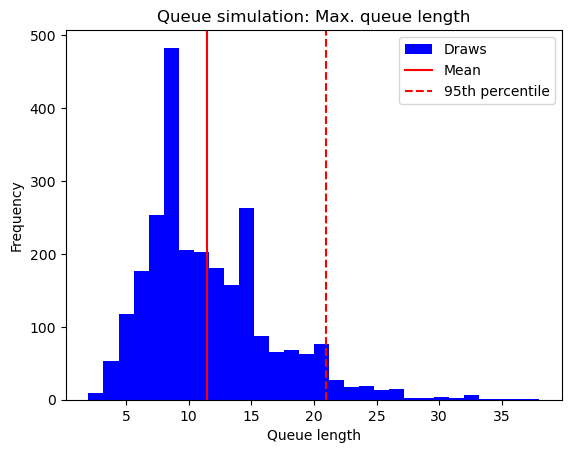

N = 2578
Mean = 11.43522110162917 MSE: 0.0100 MSE_bootstrap: 0.0099
95% quantile=21.0000 MSE_bootstrap: 0.0960


In [43]:
means,vars,data = draw(seed=2024,precision=0.1)
theP=95
data.sort()
quantile = float(np.percentile(data, theP))
MSE  = np.var(data)/len(data)

MSE_bootstrap = bootstrap(data)
MSE_quantile = bootstrap_quantile(data)

mean = np.mean(data)
percentile_95 = np.percentile(data, 95)

std = np.sqrt(vars)
plt.figure(figsize=(10, 5))
plt.plot(means, label='Mean')
# plt.plot(vars, label='Variance Maximum Queue Length')
plt.plot(std, label='Std. dev.')
plt.xlabel('Epoch')
plt.ylabel('Queue Length')
plt.title('Mean and Std. dev. of Maximum Queue Length Over Simulation Runs')
plt.legend()
plt.show()



plt.hist(data, bins=30, color='blue', label='Draws')  # Adjust the number of bins as needed
plt.axvline(mean, color='red', linestyle='-', label='Mean')
plt.axvline(percentile_95, color='red', linestyle='--', label='95th percentile')

plt.xlabel('Queue length')
plt.ylabel('Frequency')
plt.title('Queue simulation: Max. queue length')
plt.legend()
plt.show()

# mse = np.mean((data - mean)**2)/n
print('N = '+str(len(data)))
print('Mean = '+ str(mean),f'MSE: {MSE:.4f}', f'MSE_bootstrap: {MSE_bootstrap:.4f}')
print(f'{theP}% quantile={quantile:.4f}',f'MSE_bootstrap: {MSE_quantile:.4f}')